Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = ""
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
import quandl
quandl.ApiConfig.api_key = " "

In [3]:
from datetime import date
from dateutil.relativedelta import relativedelta
from typing import List

months_ago: int = 60

start = date.today() + relativedelta(months=-months_ago)
end = date.today()

all_stocks_list = ['FB', 'MMM', 'IBM', 'AMZN']
df_list: List = []

print(f"Start date is {start}")
print(f"End date is {end}")

for name in all_stocks_list:
    df = web.DataReader(name, 'quandl', start, end, api_key = 'B1_Sw5EeEUV_Dw_rxh4U')
    df.name = name
    df_list.append(df)

Start date is 2017-07-26
End date is 2022-07-26


### Resampling data for AMAZON, FB, IBM, MMM and selecting Adjusted Close for each

In [4]:
adjusted_close_list: List = []
import time

for df in df_list:
    name = df.name
    if 'Date' not in df.columns:
        df['Date'] = df.index
    df = df.reset_index(drop=True)
    df['Date'] = pd.to_datetime(df['Date'])  # converting string date to datetime date for Date column
    df = df.loc[df.groupby(df['Date'].dt.to_period('m'))['Date'].idxmax()]
    df = df.set_index(['Date']) # setting df index to Date column

    try:
        adjusted_close_series = df['AdjClose'] # getting the series with AdjClose column

    except KeyError:
        adjusted_close_series = df['Adj Close'] # getting the series with AdjClose column #for yf

    adjusted_close_series.name = name
    adjusted_close_list.append(adjusted_close_series) #appending to list

In [5]:
print("Adjusted closing price before resampling")
display(pd.DataFrame([x["AdjClose"].rename(x.name) for x in df_list]).T.fillna(0))

print("Adjusted closing price after resampling")
display(pd.DataFrame(adjusted_close_list).T.fillna(0))

Adjusted closing price before resampling


,FB,MMM,IBM,AMZN
Date,,,,
2017-07-26,165.61,197.882755,142.420360,1052.80
2017-07-27,170.44,198.896875,142.136225,1046.00
2017-07-28,172.45,198.568777,141.371999,1020.04
2017-07-31,169.25,200.010419,141.744314,987.78
2017-08-01,169.86,202.008833,142.361574,996.19
...,...,...,...,...
2018-03-21,169.39,0.000000,156.690000,1581.86
2018-03-22,164.89,0.000000,152.090000,1544.10
2018-03-23,159.39,0.000000,148.890000,1495.56


Adjusted closing price after resampling


,FB,MMM,IBM,AMZN
Date,,,,
2017-07-31,169.25,200.010419,141.744314,987.78
2017-08-31,172.00,204.320000,141.616660,980.60
2017-09-29,170.81,209.900000,143.646403,961.35
2017-10-31,180.06,230.190000,152.537668,1105.28
2017-11-28,0.00,235.630000,0.000000,0.00
2017-11-30,177.18,0.000000,153.970000,1176.75
2017-12-05,0.00,238.260000,0.000000,0.00
2017-12-29,176.46,0.000000,153.420000,1169.47
2018-01-31,186.89,0.000000,163.700000,1451.65


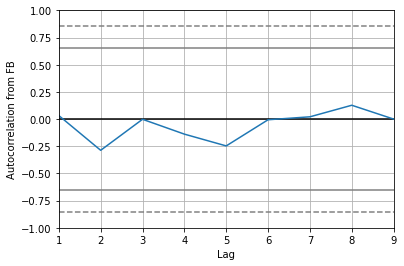

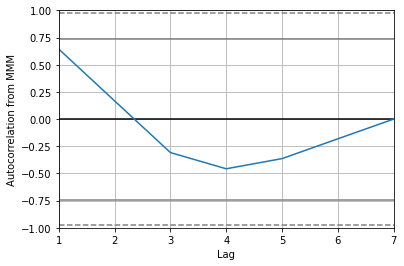

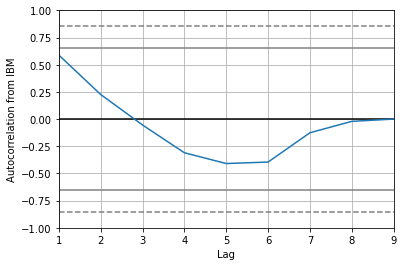

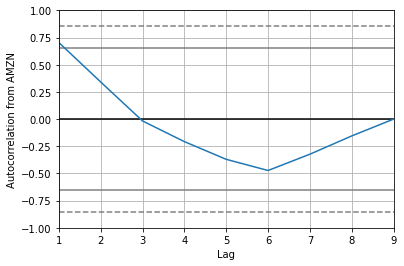

In [6]:
import matplotlib.pyplot as plt

for closing in adjusted_close_list:
    x = pd.plotting.autocorrelation_plot(closing)
    plt.ylabel(f'Autocorrelation from {closing.name}')
    plt.show()
    x.plot()

### Shift trick to manually solve the returns and then showing the correlation function for each

In [7]:
stock_returns_list: List = []

for closing in adjusted_close_list:
    shifted_closing_price = closing.shift(1)

    stock_return = ((closing)/ shifted_closing_price) - 1
    stock_return = stock_return.fillna(0) # make sure no NaN value
    stock_return.name = closing.name
    stock_returns_list.append(stock_return.fillna(0))

In [8]:
print("Displaying all stock returns")
display(pd.DataFrame(stock_returns_list).T.fillna(0))

Displaying all stock returns


,FB,MMM,IBM,AMZN
Date,,,,
2017-07-31,0.000000,0.000000,0.000000,0.000000
2017-08-31,0.016248,0.021547,-0.000901,-0.007269
2017-09-29,-0.006919,0.027310,0.014333,-0.019631
2017-10-31,0.054154,0.096665,0.061897,0.149717
2017-11-28,0.000000,0.023633,0.000000,0.000000
2017-11-30,-0.015995,0.000000,0.009390,0.064662
2017-12-05,0.000000,0.011162,0.000000,0.000000
2017-12-29,-0.004064,0.000000,-0.003572,-0.006187
2018-01-31,0.059107,0.000000,0.067006,0.241289


Plotting the stock returns


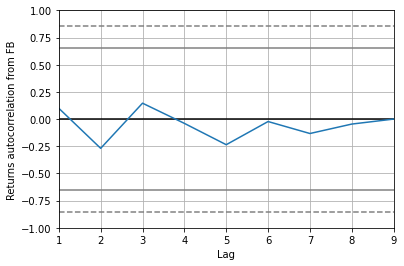

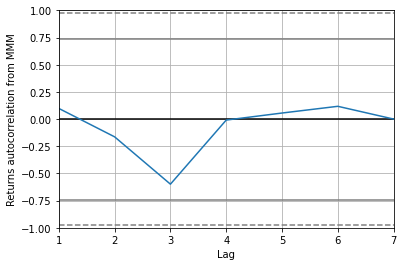

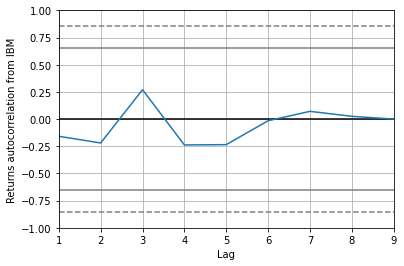

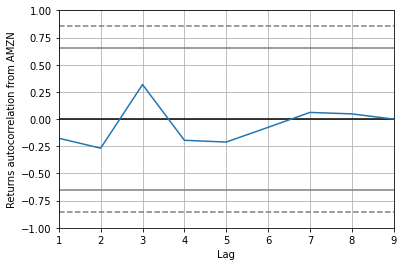

In [9]:
print("Plotting the stock returns")

for stock_return in stock_returns_list:

    x = pd.plotting.autocorrelation_plot(stock_return)
    plt.ylabel(f'Returns autocorrelation from {stock_return.name}')
    plt.show()
    x.plot()

### Combining returns into 1 dataframe and visualization using scatter plot

,FB,MMM,IBM,AMZN
Date,,,,
2017-07-31,0.000000,0.000000,0.000000,0.000000
2017-08-31,0.016248,0.021547,-0.000901,-0.007269
2017-09-29,-0.006919,0.027310,0.014333,-0.019631
2017-10-31,0.054154,0.096665,0.061897,0.149717
2017-11-28,0.000000,0.023633,0.000000,0.000000
2017-11-30,-0.015995,0.000000,0.009390,0.064662
2017-12-05,0.000000,0.011162,0.000000,0.000000
2017-12-29,-0.004064,0.000000,-0.003572,-0.006187
2018-01-31,0.059107,0.000000,0.067006,0.241289


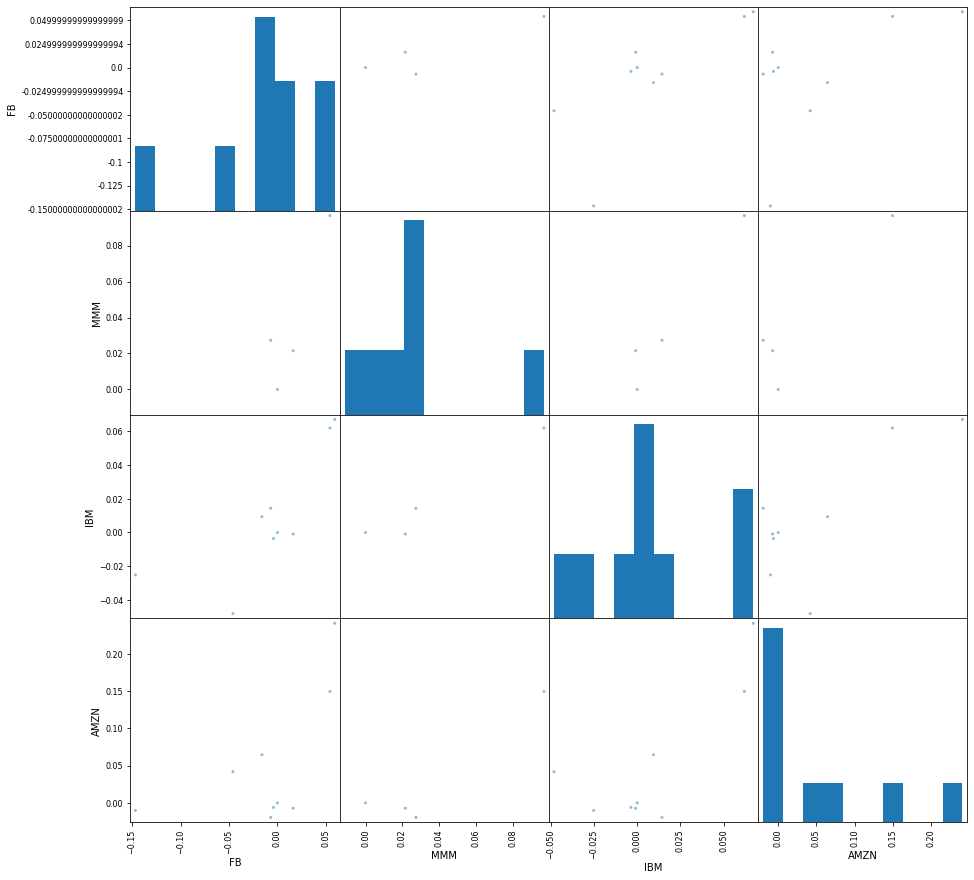

In [10]:
all_returns = pd.concat(stock_returns_list, axis = 1);
display(pd.DataFrame(all_returns).fillna(0))
scatter_matrix = pd.plotting.scatter_matrix(all_returns, figsize=[15,15]);

# for ax in scatter_matrix.ravel():
#     ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 90);
#     ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 0);